In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


## Importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams["ps.useafm"] = True
import random
random.seed(21)
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

#### Training dataset

In [3]:
df = pd.read_csv('../input/heartbeat/mitbih_train.csv', header=None)
print("The shape of train dataset : ",df.shape)
df.head()

The shape of train dataset :  (87554, 188)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.98,0.93,0.68,0.25,0.15,0.19,0.15,0.09,0.06,0.05,0.04,0.06,0.07,0.06,0.05,0.07,0.06,0.06,0.07,0.07,0.10,0.08,0.09,0.11,0.12,0.10,0.12,0.12,0.14,0.13,0.15,0.14,0.16,0.14,0.16,0.15,0.15,0.14,0.15,0.15,0.15,0.13,0.13,0.13,0.14,0.11,0.11,0.11,0.11,0.10,0.09,0.10,0.10,0.11,0.10,0.12,0.11,0.12,0.13,0.14,0.15,0.14,0.17,0.23,0.24,0.25,0.23,0.23,0.20,0.18,0.13,0.12,0.12,0.12,0.11,0.13,0.12,0.08,0.00,0.07,0.31,0.61,0.86,1.00,0.96,0.75,0.30,0.16,0.21,0.16,0.10,0.10,0.09,0.10,0.10,0.10,0.09,0.10,0.10,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.96,0.86,0.46,0.20,0.09,0.13,0.10,0.09,0.07,0.08,0.07,0.06,0.07,0.07,0.06,0.08,0.07,0.08,0.09,0.10,0.08,0.08,0.09,0.11,0.12,0.15,0.18,0.19,0.21,0.21,0.22,0.25,0.27,0.29,0.28,0.29,0.26,0.25,0.19,0.15,0.11,0.08,0.08,0.07,0.01,0.01,0.06,0.05,0.06,0.05,0.03,0.03,0.08,0.03,0.03,0.04,0.09,0.09,0.04,0.06,0.07,0.08,0.09,0.10,0.11,0.09,0.09,0.07,0.09,0.09,0.08,0.08,0.10,0.10,0.13,0.10,0.04,0.07,0.07,0.08,0.09,0.06,0.05,0.10,0.04,0.01,0.02,0.03,0.01,0.01,0.03,0.05,0.06,0.09,0.07,0.01,0.06,0.04,0.04,0.03,0.00,0.02,0.03,0.01,0.03,0.02,0.02,0.03,0.01,0.05,0.07,0.14,0.29,0.53,0.78,1.00,0.89,0.49,0.19,0.09,0.06,0.03,0.00,0.03,0.02,0.00,0.00,0.05,0.05,0.05,0.04,0.05,0.06,0.06,0.07,0.08,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.66,0.19,0.07,0.07,0.06,0.06,0.04,0.05,0.05,0.06,0.04,0.07,0.06,0.08,0.07,0.09,0.08,0.11,0.11,0.14,0.14,0.17,0.18,0.22,0.24,0.27,0.29,0.32,0.32,0.33,0.30,0.27,0.22,0.19,0.13,0.12,0.06,0.06,0.04,0.05,0.04,0.04,0.02,0.05,0.04,0.06,0.04,0.04,0.03,0.04,0.04,0.05,0.03,0.05,0.03,0.06,0.05,0.08,0.06,0.09,0.10,0.12,0.09,0.09,0.06,0.07,0.04,0.05,0.02,0.02,0.01,0.03,0.01,0.02,0.01,0.03,0.02,0.02,0.04,0.24,0.59,0.96,0.58,0.12,0.00,0.04,0.04,0.03,0.02,0.03,0.01,0.03,0.02,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.93,0.67,0.54,0.28,0.20,0.08,0.07,0.06,0.07,0.06,0.06,0.08,0.09,0.09,0.11,0.12,0.14,0.13,0.14,0.09,0.09,0.07,0.07,0.08,0.10,0.12,0.14,0.14,0.14,0.15,0.11,0.10,0.06,0.03,0.04,0.01,0.01,0.01,0.03,0.01,0.00,0.01,0.02,0.07,0.08,0.06,0.06,0.06,0.10,0.12,0.17,0.20,0.23,0.24,0.27,0.24,0.22,0.20,0.20,0.20,0.17,0.16,0.19,0.20,0.17,0.14,0.09,0.00,0.01,0.00,0.04,0.05,0.06,0.11,0.12,0.14,0.14,0.17,0.39,0.77,1.00,0.85,0.67,0.46,0.32,0.19,0.12,0.08,0.08,0.07,0.06,0.07,0.09,0.10,0.10,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

#### Testing dataset

In [4]:
df_test = pd.read_csv('../input/heartbeat/mitbih_test.csv',header=None)
print("The shape of test dataset : ",df_test.shape)
df_test.head()

The shape of test dataset :  (21892, 188)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.00,0.76,0.11,0.00,0.08,0.08,0.07,0.05,0.05,0.04,0.03,0.03,0.04,0.03,0.04,0.04,0.04,0.05,0.05,0.05,0.07,0.07,0.08,0.10,0.12,0.13,0.17,0.20,0.21,0.24,0.25,0.26,0.29,0.27,0.27,0.24,0.21,0.17,0.16,0.12,0.12,0.11,0.11,0.10,0.11,0.10,0.11,0.10,0.11,0.11,0.12,0.11,0.12,0.11,0.12,0.11,0.11,0.11,0.12,0.11,0.11,0.10,0.10,0.09,0.09,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.08,0.07,0.07,0.07,0.07,0.07,0.09,0.10,0.11,0.11,0.12,0.12,0.11,0.10,0.10,0.10,0.09,0.07,0.07,0.05,0.06,0.05,0.06,0.05,0.06,0.05,0.05,0.00,0.01,0.19,0.68,0.98,0.62,0.04,0.01,0.09,0.07,0.07,0.05,0.04,0.04,0.03,0.04,0.04,0.05,0.04,0.05,0.04,0.05,0.05,0.06,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.91,0.78,0.53,0.36,0.37,0.34,0.33,0.31,0.30,0.30,0.30,0.34,0.38,0.39,0.44,0.45,0.46,0.48,0.51,0.53,0.59,0.59,0.60,0.63,0.62,0.58,0.56,0.52,0.49,0.49,0.47,0.45,0.45,0.47,0.45,0.43,0.42,0.41,0.39,0.37,0.37,0.37,0.32,0.31,0.33,0.31,0.32,0.32,0.34,0.34,0.33,0.30,0.31,0.28,0.27,0.29,0.26,0.27,0.28,0.27,0.28,0.29,0.29,0.29,0.29,0.29,0.29,0.28,0.27,0.26,0.25,0.22,0.22,0.24,0.22,0.27,0.42,0.58,0.62,0.62,0.76,0.86,1.00,0.91,0.67,0.32,0.15,0.12,0.10,0.04,0.02,0.02,0.03,0.00,0.01,0.03,0.01,0.02,0.04,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.73,0.21,0.00,0.12,0.10,0.10,0.11,0.12,0.12,0.13,0.11,0.14,0.13,0.15,0.13,0.15,0.13,0.15,0.12,0.16,0.14,0.14,0.13,0.15,0.13,0.15,0.12,0.12,0.10,0.09,0.07,0.08,0.07,0.07,0.08,0.09,0.09,0.08,0.08,0.09,0.09,0.11,0.11,0.12,0.10,0.12,0.12,0.14,0.13,0.15,0.15,0.17,0.16,0.16,0.17,0.17,0.16,0.18,0.19,0.20,0.18,0.20,0.19,0.20,0.19,0.21,0.20,0.21,0.21,0.23,0.24,0.28,0.31,0.39,0.45,0.43,0.37,0.36,0.27,0.22,0.18,0.19,0.19,0.19,0.19,0.23,0.18,0.23,0.67,1.00,0.46,0.19,0.20,0.21,0.19,0.21,0.19,0.19,0.19,0.21,0.21,0.22,0.21,0.23,0.22,0.23,0.23,0.23,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.91,0.68,0.47,0.23,0.07,0.00,0.00,0.01,0.05,0.10,0.12,0.15,0.17,0.17,0.17,0.17,0.16,0.16,0.15,0.15,0.15,0.15,0.15,0.14,0.14,0.15,0.16,0.17,0.18,0.19,0.21,0.22,0.24,0.26,0.28,0.29,0.31,0.32,0.33,0.34,0.35,0.35,0.35,0.35,0.35,0.35,0.34,0.34,0.34,0.34,0.34,0.34,0.34,0.36,0.36,0.36,0.35,0.36,0.36,0.34,0.30,0.29,0.27,0.27,0.26,0.26,0.26,0.27,0.26,0.26,0.27,0.27,0.27,0.28,0.27,0.28,0.28,0.28,0.28,0.28,0.26,0.32,0.48,0.61,0.75,0.90,0.97,0.94,0.74,0.55,0.31,0.13,0.02,0.02,0.02,0.06,0.10,0.12,0.16,0.18,0.17,0.17,0.17,0.16,0.00

## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [6]:
df[187] = df[187].astype('int64')
target_col = df[187]
labels = ['Normal beat','Supraventricular premature beat','Premature ventricular contraction','Fusion of ventricular and normal beat','Unclassifiable beat']

#### Imbalanced Dataset

In [7]:
pd.Series(np.bincount(target_col),index=labels)

Normal beat                              72471
Supraventricular premature beat           2223
Premature ventricular contraction         5788
Fusion of ventricular and normal beat      641
Unclassifiable beat                       6431
dtype: int64

Text(0.5, 1.0, 'Training dataset distribution among 5 classes')

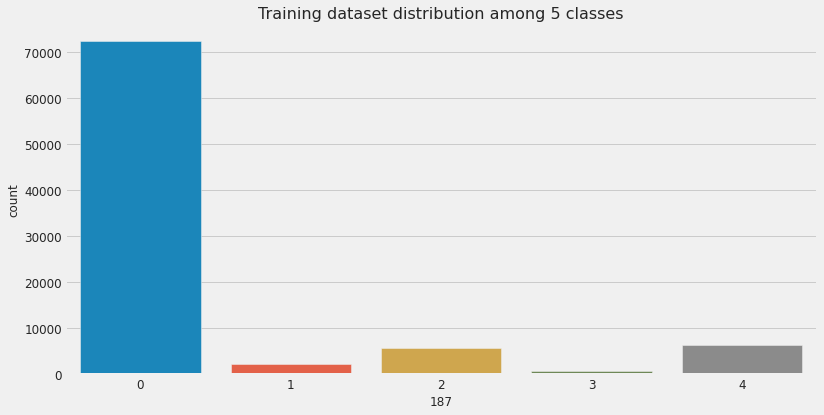

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(target_col)
plt.title("Training dataset distribution among 5 classes",fontsize=16)

In [9]:
X = df.drop(187,axis=1)
y = target_col
print(X.shape)
print(y.shape)

x_test = df_test.drop(187,axis=1)
y_test = df_test[187].astype('int64')
print(x_test.shape)
print(y_test.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [10]:
C0 = (target_col == 0)
C1 = (target_col == 1)
C2 = (target_col == 2)
C3 = (target_col == 3)
C4 = (target_col == 4)

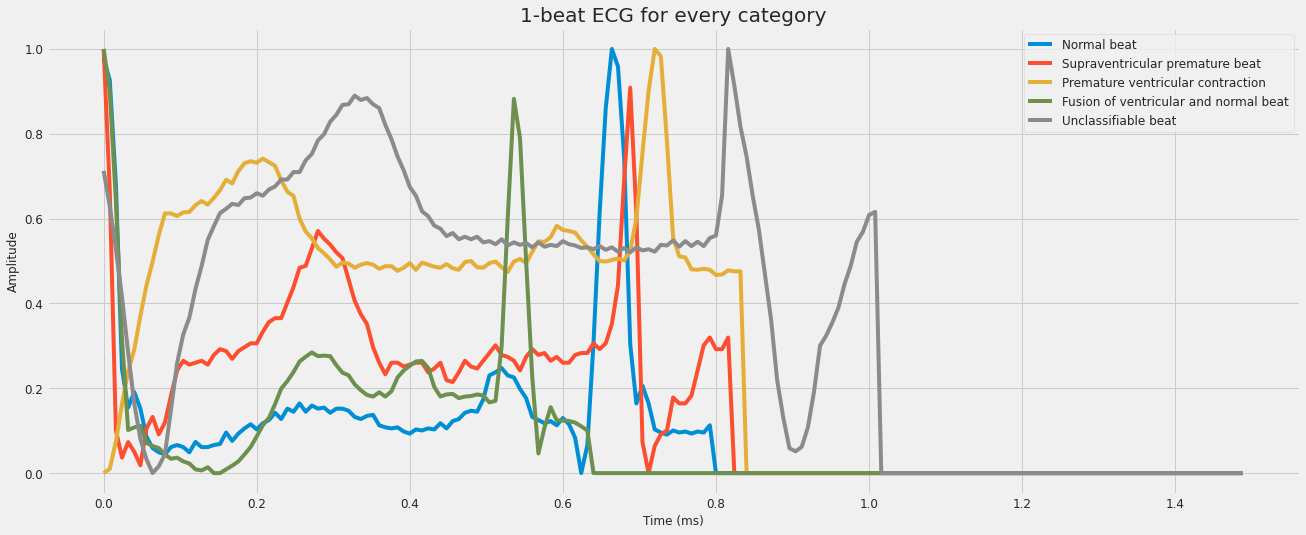

In [11]:
# df[C0].iloc[0]
x = np.arange(0, 187)*8/1000
plt.figure()
plt.plot(x, X[C0].iloc[0], label=labels[0])
plt.plot(x, X[C1].iloc[0], label=labels[1])
plt.plot(x, X[C2].iloc[0], label=labels[2])
plt.plot(x, X[C3].iloc[0], label=labels[3])
plt.plot(x, X[C4].iloc[0], label=labels[4])
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude")
plt.xlabel("Time (ms)")
plt.show()

## Data Preparation for model evaluation

### Let's prepare a validation set which we will be useful for estimating model performance later.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y.values,random_state=42,stratify=y.values,shuffle=True,train_size=0.80)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)

The shape of training data :  (70043, 187) (70043,)
The shape of validation data :  (17511, 187) (17511,)


#### Distribution of samples on training dataset

In [13]:
pd.Series(np.bincount(y_train),index=labels)

Normal beat                              57977
Supraventricular premature beat           1778
Premature ventricular contraction         4630
Fusion of ventricular and normal beat      513
Unclassifiable beat                       5145
dtype: int64

#### Distribution of samples on validation dataset

In [14]:
pd.Series(np.bincount(y_val),index=labels)

Normal beat                              14494
Supraventricular premature beat            445
Premature ventricular contraction         1158
Fusion of ventricular and normal beat      128
Unclassifiable beat                       1286
dtype: int64

#### Distribution of samples on testing dataset

In [15]:
pd.Series(np.bincount(y_test),index=labels)

Normal beat                              18118
Supraventricular premature beat            556
Premature ventricular contraction         1448
Fusion of ventricular and normal beat      162
Unclassifiable beat                       1608
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [17]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = np.expand_dims(x_train, 2)
x_val = np.expand_dims(x_val, 2)
x_test = np.expand_dims(x_test, 2)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)
print("The shape of testing data : ",x_test.shape,y_test.shape)

The shape of training data :  (70043, 187, 1) (70043, 5)
The shape of validation data :  (17511, 187, 1) (17511, 5)
The shape of testing data :  (21892, 187, 1) (21892, 5)


In [18]:
y_test[0]

array([1., 0., 0., 0., 0.], dtype=float32)

## Data Modelling

In [19]:
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation , Dropout, BatchNormalization, AveragePooling1D, ZeroPadding1D
from keras import backend as K
from keras import Sequential
from keras.initializers import glorot_uniform

## Resnet model 

In [20]:
n_obs, feature, depth = x_train.shape
batch_size = 512

In [21]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [22]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [23]:
def ResNet(input_shape=(feature,depth)):

    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)

    X = Conv1D(64, 7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides= 2)(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size= 2, padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet')

    return model

In [24]:
base_model = ResNet(input_shape=(feature,depth))

2022-02-19 20:45:00.885544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:45:01.001180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:45:01.001870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:45:01.002983: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(5,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [26]:
model = Model(inputs=base_model.input, outputs=headModel)

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
zero_padding1d (ZeroPadding1D)  (None, 193, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 94, 64)       512         zero_padding1d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 94, 64)       256         conv1[0][0]                      
______________________________________________________________________________________________

In [28]:
model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['AUC']
                )

In [29]:
import keras
h = model.fit(
      x_train,y_train,validation_data=(x_val,y_val),
                              epochs=40,batch_size=batch_size,
                        callbacks = [
                              keras.callbacks.EarlyStopping(monitor='val_auc',patience=5,mode='auto'),
                              keras.callbacks.ModelCheckpoint('./model_{val_auc:.3f}.h5',
                              save_best_only = True,save_weights_only=False,
                              monitor='val_auc')
                          ])

2022-02-19 20:45:06.246600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-02-19 20:45:19.717309: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


137/137 [==============================] - 56s 264ms/step - loss: 0.3482 - auc: 0.9858 - val_loss: 0.9473 - val_auc: 0.9160
Epoch 2/40
137/137 [==============================] - 33s 242ms/step - loss: 0.0904 - auc: 0.9974 - val_loss: 0.6624 - val_auc: 0.9324
Epoch 3/40
137/137 [==============================] - 33s 242ms/step - loss: 0.0665 - auc: 0.9984 - val_loss: 0.2361 - val_auc: 0.9912
Epoch 4/40
137/137 [==============================] - 33s 242ms/step - loss: 0.0516 - auc: 0.9990 - val_loss: 0.0750 - val_auc: 0.9977
Epoch 5/40
137/137 [==============================] - 33s 241ms/step - loss: 0.0595 - auc: 0.9987 - val_loss: 0.0657 - val_auc: 0.9983
Epoch 6/40
137/137 [==============================] - 33s 242ms/step - loss: 0.0447 - auc: 0.9991 - val_loss: 0.0531 - val_auc: 0.9982


In [30]:
model.save("./model.h5")

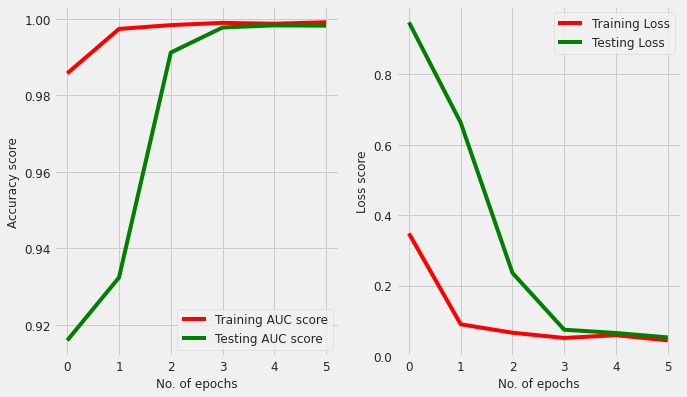

In [31]:
## Model auc score and loss visualization
auc = h.history['auc']
val_auc=h.history['val_auc']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(auc)) #No. of epochs

plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
ax0.plot(epochs,auc,'r',label='Training AUC score')
ax0.plot(epochs,val_auc,'g',label='Testing AUC score')
ax0.legend()
ax0.set_xlabel('No. of epochs')
ax0.set_ylabel('Accuracy score')


ax1.plot(epochs,loss,'r',label='Training Loss')
ax1.plot(epochs,val_loss,'g',label='Testing Loss')
ax1.set_xlabel('No. of epochs')
ax1.set_ylabel('Loss score')
ax1.legend()
plt.show()

#### Validation auc score

In [32]:
model.evaluate(x_val,y_val)

548/548 [==============================] - 10s 18ms/step - loss: 0.0531 - auc: 0.9982


[0.053109198808670044, 0.9982245564460754]

#### Testing auc score

In [33]:
model.evaluate(x_test,y_test)

685/685 [==============================] - 12s 18ms/step - loss: 0.0704 - auc: 0.9974


[0.07037624716758728, 0.9973779916763306]

#### Prediction on validation dataset

In [34]:
y_pre_val = model.predict(x_val)
y_pred_val = np.zeros(y_pre_val.shape[0])
for i in range(y_pred_val.shape[0]):
    y_pred_val[i] = np.argmax(y_pre_val[i])
y_pred_val = tf.keras.utils.to_categorical(y_pred_val)

#### Prediction on Testing dataset

In [35]:
y_pre = model.predict(x_test)
y_pred = np.zeros(y_pre.shape[0])
for i in range(y_pred.shape[0]):
    y_pred[i] = np.argmax(y_pre[i])
y_pred = tf.keras.utils.to_categorical(y_pred)

## Results 

#### For validation dataset

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(y_true=y_val,y_pred=y_pred_val))
f1_score_per_class_validation = f1_score(y_true=y_val,y_pred=y_pred_val,average=None) 
print("The f1-score per class: ",f1_score_per_class_validation)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14494
           1       0.88      0.85      0.86       445
           2       0.97      0.95      0.96      1158
           3       0.86      0.72      0.78       128
           4       0.99      0.99      0.99      1286

   micro avg       0.99      0.99      0.99     17511
   macro avg       0.94      0.90      0.92     17511
weighted avg       0.99      0.99      0.99     17511
 samples avg       0.99      0.99      0.99     17511

The f1-score per class:  [0.99218562 0.8630137  0.96296296 0.78297872 0.98948189]


#### For testing dataset

In [37]:
print(classification_report(y_true=y_test,y_pred=y_pred))
f1_score_per_class_test = f1_score(y_true=y_test,y_pred=y_pred,average=None) 
print("The f1-score per class: ",f1_score_per_class_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.83      0.78      0.81       556
           2       0.97      0.94      0.96      1448
           3       0.83      0.73      0.77       162
           4       0.99      0.98      0.99      1608

   micro avg       0.98      0.98      0.98     21892
   macro avg       0.92      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892
 samples avg       0.98      0.98      0.98     21892

The f1-score per class:  [0.9904018  0.80779944 0.957223   0.77377049 0.98588899]


#### For validation dataset

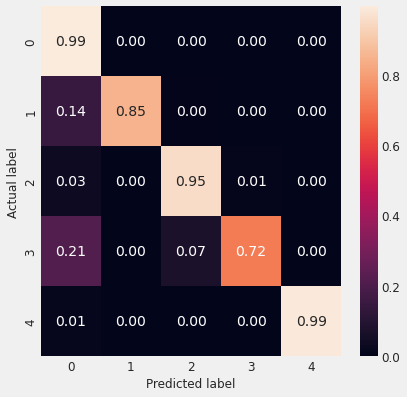

In [38]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=np.argmax(y_val,axis=1),y_pred=np.argmax(y_pred_val,axis=1),normalize="true")
sns.heatmap(cm, annot=True, ax = ax, fmt = '.2f',)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()


#### For testing dataset

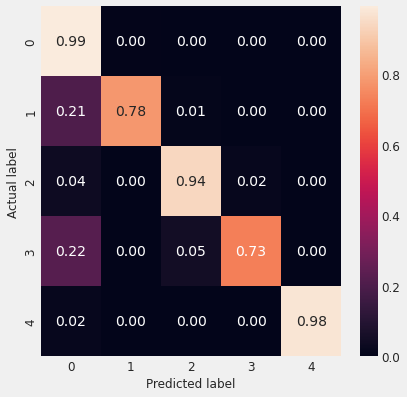

In [39]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=np.argmax(y_test,axis=1),y_pred=np.argmax(y_pred,axis=1),normalize="true")
sns.heatmap(cm, annot=True, ax = ax, fmt = '.2f')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## End Notes

#### Validation Results

In [40]:
for i in range(len(labels)):
    print("The f1-score for class "+str(i)+" ("+str(labels[i])+") : ",f1_score_per_class_validation[i])

The f1-score for class 0 (Normal beat) :  0.9921856174050742
The f1-score for class 1 (Supraventricular premature beat) :  0.8630136986301371
The f1-score for class 2 (Premature ventricular contraction) :  0.9629629629629629
The f1-score for class 3 (Fusion of ventricular and normal beat) :  0.7829787234042553
The f1-score for class 4 (Unclassifiable beat) :  0.9894818854694197


#### Test Results

In [41]:
for i in range(len(labels)):
    print("The f1-score for class "+str(i)+" ("+str(labels[i])+") : ",f1_score_per_class_test[i])

The f1-score for class 0 (Normal beat) :  0.9904018041307995
The f1-score for class 1 (Supraventricular premature beat) :  0.8077994428969358
The f1-score for class 2 (Premature ventricular contraction) :  0.9572230014025245
The f1-score for class 3 (Fusion of ventricular and normal beat) :  0.7737704918032787
The f1-score for class 4 (Unclassifiable beat) :  0.9858889934148636


If you know truly about the problem statement then you will be amazed by the results we got....!!

Any suggestions or doubts are most welcome here and kindly correct me if any mistakes have been done by me. 

Thank you for visiting the notebook and if you found the notebook useful, please upvote the notebook.

Stay tuned for now and bookmark this notebook for further updates.